## Dependencias

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

## Dataset

In [4]:
os.environ["KAGGLE_CONFIG_DIR"] = "."
!kaggle competitions download -c udea-ai-4-eng-20252-pruebas-saber-pro-colombia
!unzip udea-ai-4-eng-20252-pruebas-saber-pro-colombia.zip

  0% 0.00/29.9M [00:00<?, ?B/s]
100% 29.9M/29.9M [00:00<00:00, 1.35GB/s]
Archive:  udea-ai-4-eng-20252-pruebas-saber-pro-colombia.zip
  inflating: submission_example.csv  
  inflating: test.csv                
  inflating: train.csv               


In [5]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

## Análisis Exploratorio




### Información General

In [8]:
print("--- Dimensiones ---")
print("df_train shape:", df_train.shape)
print("df_test shape:", df_test.shape)

print("\n--- Tipos de datos (df_train) ---")
print(df_train.dtypes.value_counts())
print(df_train.dtypes.head(20))

print("\nPrimeras filas de df_train:")
print(df_train.head())

--- Dimensiones ---
df_train shape: (692500, 21)
df_test shape: (296786, 20)

--- Tipos de datos (df_train) ---
object     15
float64     4
int64       2
Name: count, dtype: int64
ID                               int64
PERIODO_ACADEMICO                int64
E_PRGM_ACADEMICO                object
E_PRGM_DEPARTAMENTO             object
E_VALORMATRICULAUNIVERSIDAD     object
E_HORASSEMANATRABAJA            object
F_ESTRATOVIVIENDA               object
F_TIENEINTERNET                 object
F_EDUCACIONPADRE                object
F_TIENELAVADORA                 object
F_TIENEAUTOMOVIL                object
E_PRIVADO_LIBERTAD              object
E_PAGOMATRICULAPROPIO           object
F_TIENECOMPUTADOR               object
F_TIENEINTERNET.1               object
F_EDUCACIONMADRE                object
RENDIMIENTO_GLOBAL              object
INDICADOR_1                    float64
INDICADOR_2                    float64
INDICADOR_3                    float64
dtype: object

Primeras filas de df_trai

### Missing y Varianza por Columna

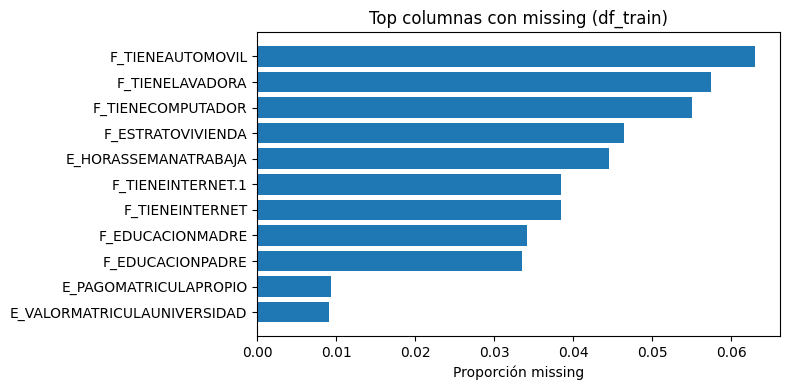

In [12]:
def missing_report(df, name):
  missing = pd.DataFrame({
    'missing_count': df.isna().sum(),
    'missing_frac': df.isna().mean()
  }).sort_values('missing_frac', ascending=False)
  return missing


missing_train = missing_report(df_train, "df_train")
missing_test = missing_report(df_test, "df_test")

# Visualizar top 20 missing
plt.figure(figsize=(8,4))
top_missing = missing_train[missing_train['missing_frac']>0].head(20)
plt.barh(top_missing.index.astype(str), top_missing['missing_frac'])
plt.xlabel('Proporción missing')
plt.title('Top columnas con missing (df_train)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [40]:
# Columnas con baja variabilidad (abarca más de 85%)
low_variability = []
threshold = 0.85

for c in df_train.columns:
    top_frac = df_train[c].value_counts(normalize=True, dropna=False).max()
    if top_frac > threshold:
        low_variability.append((c, top_frac))

low_var_df = pd.DataFrame(low_variability, columns=['columna','frac_dominante'])
print("Columnas con baja variabilidad:")
print(low_var_df)

Columnas con baja variabilidad:
              columna  frac_dominante
0     F_TIENEINTERNET        0.855616
1  E_PRIVADO_LIBERTAD        0.999951
2   F_TIENECOMPUTADOR        0.863061
3   F_TIENEINTERNET.1        0.855616


### Variable Objetivo (RENDIMIENTO_GLOBAL)

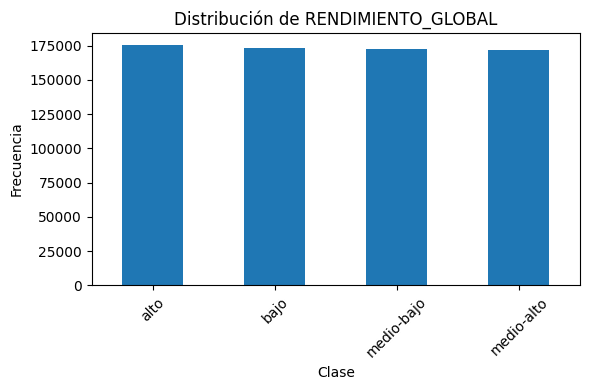

In [14]:
if 'RENDIMIENTO_GLOBAL' in df_train.columns:
  target_counts = df_train['RENDIMIENTO_GLOBAL'].value_counts()
  target_frac = df_train['RENDIMIENTO_GLOBAL'].value_counts(normalize=True)

  plt.figure(figsize=(6,4))
  ax = target_counts.plot(kind='bar')
  ax.set_title('Distribución de RENDIMIENTO_GLOBAL')
  ax.set_xlabel('Clase')
  ax.set_ylabel('Frecuencia')
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()
else:
  print("No existe la columna RENDIMIENTO_GLOBAL en df_train")

### Variables Categóricas

In [30]:
cat_cols = [c for c in df_train.columns if df_train[c].dtype=='object' or isinstance(df_train[c].dtype, pd.CategoricalDtype)]
print("Columnas categóricas detectadas:", cat_cols[:20])

# Distribución en variables de alta cardinalidad
high_card_cols = [c for c in cat_cols if df_train[c].nunique(dropna=False) > 30]
for c in high_card_cols:
  print(f"\nTop 10 categorías para {c}:")
  print(df_train[c].value_counts().head(10))


Columnas categóricas detectadas: ['E_PRGM_ACADEMICO', 'E_PRGM_DEPARTAMENTO', 'E_VALORMATRICULAUNIVERSIDAD', 'E_HORASSEMANATRABAJA', 'F_ESTRATOVIVIENDA', 'F_TIENEINTERNET', 'F_EDUCACIONPADRE', 'F_TIENELAVADORA', 'F_TIENEAUTOMOVIL', 'E_PRIVADO_LIBERTAD', 'E_PAGOMATRICULAPROPIO', 'F_TIENECOMPUTADOR', 'F_TIENEINTERNET.1', 'F_EDUCACIONMADRE', 'RENDIMIENTO_GLOBAL']

Top 10 categorías para E_PRGM_ACADEMICO:
E_PRGM_ACADEMICO
DERECHO                       53244
ADMINISTRACION DE EMPRESAS    51902
CONTADURIA PUBLICA            39664
PSICOLOGIA                    31932
INGENIERIA INDUSTRIAL         28481
ADMINISTRACIÓN DE EMPRESAS    24777
INGENIERIA CIVIL              19487
MEDICINA                      18099
PSICOLOGÍA                    17377
INGENIERIA DE SISTEMAS        17150
Name: count, dtype: int64

Top 10 categorías para E_PRGM_DEPARTAMENTO:
E_PRGM_DEPARTAMENTO
BOGOTÁ             282159
ANTIOQUIA           83607
VALLE               44588
ATLANTICO           41020
SANTANDER           2882

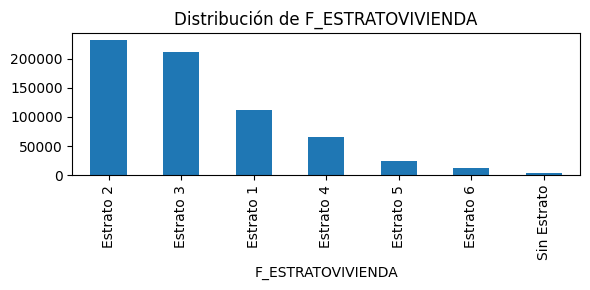

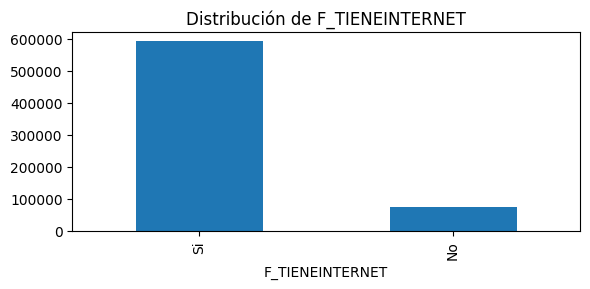

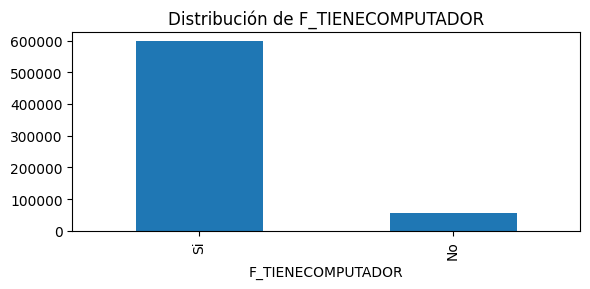

In [22]:
# Distribución socioeconómicas
socio_vars = [v for v in ['F_ESTRATOVIVIENDA','F_TIENEINTERNET','F_TIENECOMPUTADOR'] if v in df_train.columns]
for v in socio_vars:
  plt.figure(figsize=(6,3))
  df_train[v].value_counts().plot(kind='bar')
  plt.title(f'Distribución de {v}')
  plt.tight_layout()
  plt.show()


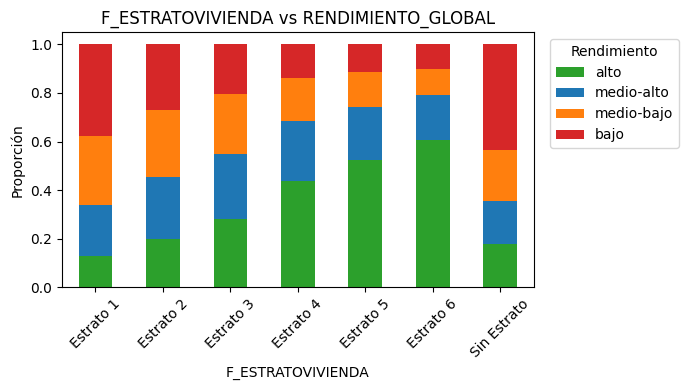

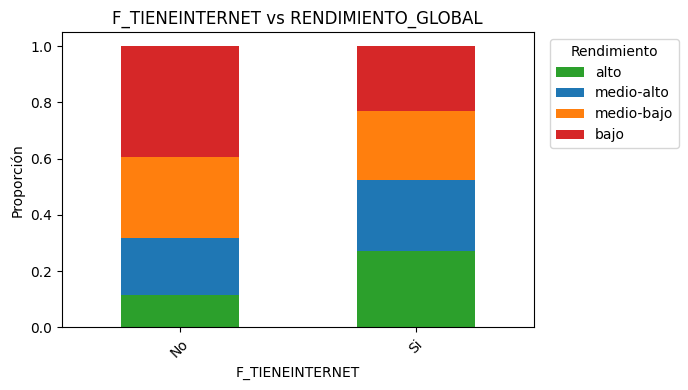

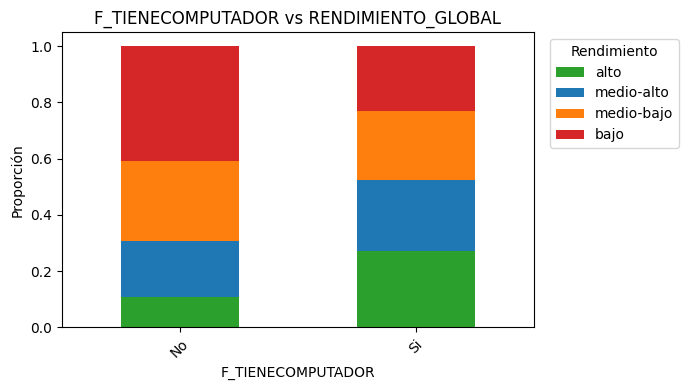

In [25]:
# Relación socioeconómicas vs target
target_order = ['alto', 'medio-alto', 'medio-bajo', 'bajo']
colors = ['#2ca02c', '#1f77b4', '#ff7f0e', '#d62728']

for v in socio_vars:
    ct = pd.crosstab(df_train[v], df_train['RENDIMIENTO_GLOBAL'], normalize='index')

    # Reordenar columnas
    cols_in_ct = [c for c in target_order if c in ct.columns]
    ct = ct[cols_in_ct]

    # Gráfico
    ax = ct.plot(kind='bar', stacked=True, figsize=(7,4), color=colors[:len(cols_in_ct)])
    ax.set_title(f'{v} vs RENDIMIENTO_GLOBAL')
    ax.set_ylabel('Proporción')
    plt.xticks(rotation=45)
    plt.legend(title='Rendimiento', bbox_to_anchor=(1.02,1), loc='upper left')
    plt.tight_layout()
    plt.show()


### Variables Numéricas

Variables numéricas encontradas: ['INDICADOR_1', 'INDICADOR_2', 'INDICADOR_3', 'INDICADOR_4']


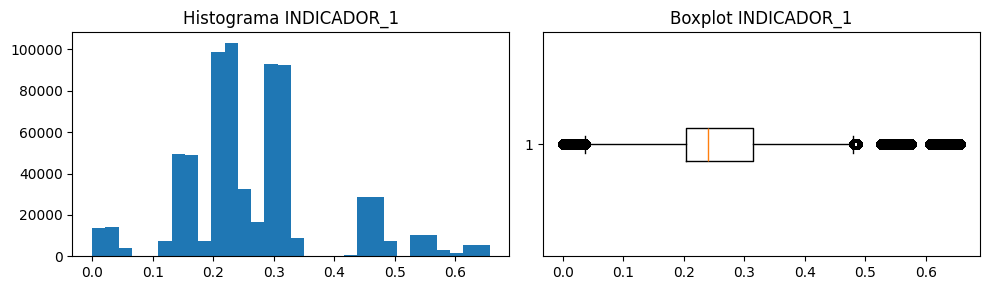

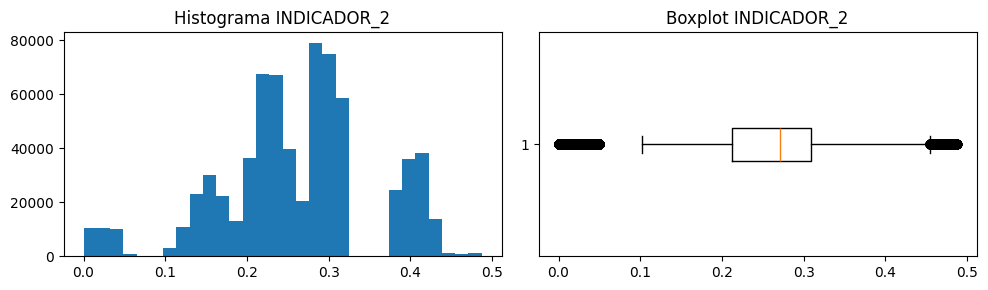

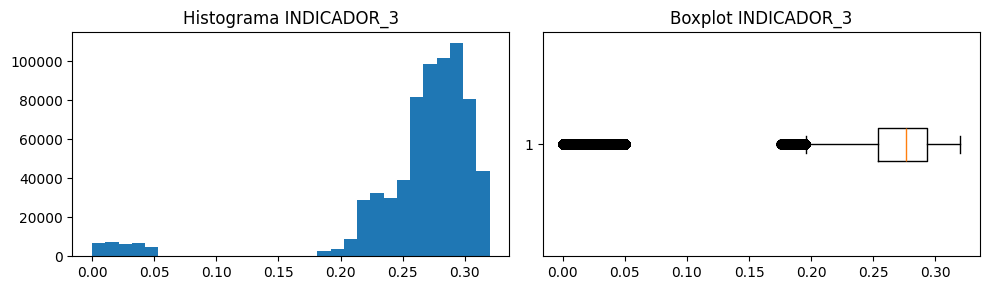

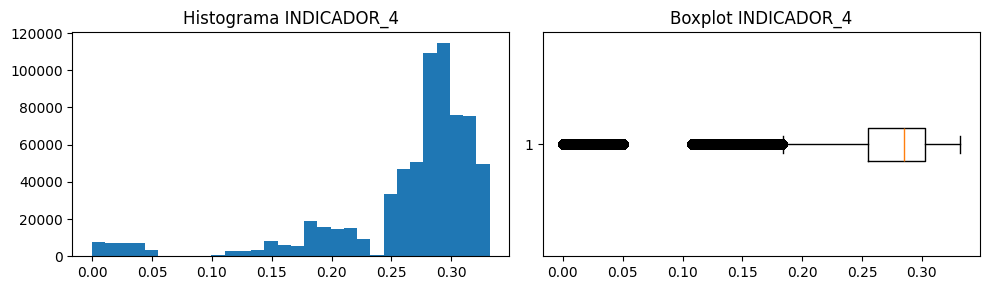

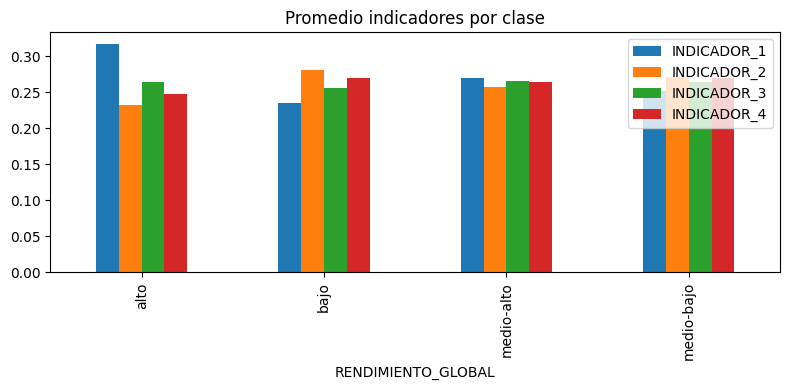

In [33]:
num_vars = [c for c in ['INDICADOR_1','INDICADOR_2','INDICADOR_3','INDICADOR_4'] if c in df_train.columns]
print("Variables numéricas encontradas:", num_vars)

for v in num_vars:
  fig, axes = plt.subplots(1,2, figsize=(10,3))
  axes[0].hist(df_train[v].dropna(), bins=30)
  axes[0].set_title(f'Histograma {v}')
  axes[1].boxplot(df_train[v].dropna(), vert=False)
  axes[1].set_title(f'Boxplot {v}')
  plt.tight_layout()
  plt.show()


if 'RENDIMIENTO_GLOBAL' in df_train.columns:
  mean_by_class = df_train.groupby('RENDIMIENTO_GLOBAL')[num_vars].mean()
  mean_by_class.plot(kind='bar', figsize=(8,4))
  plt.title('Promedio indicadores por clase')
  plt.tight_layout()
  plt.show()

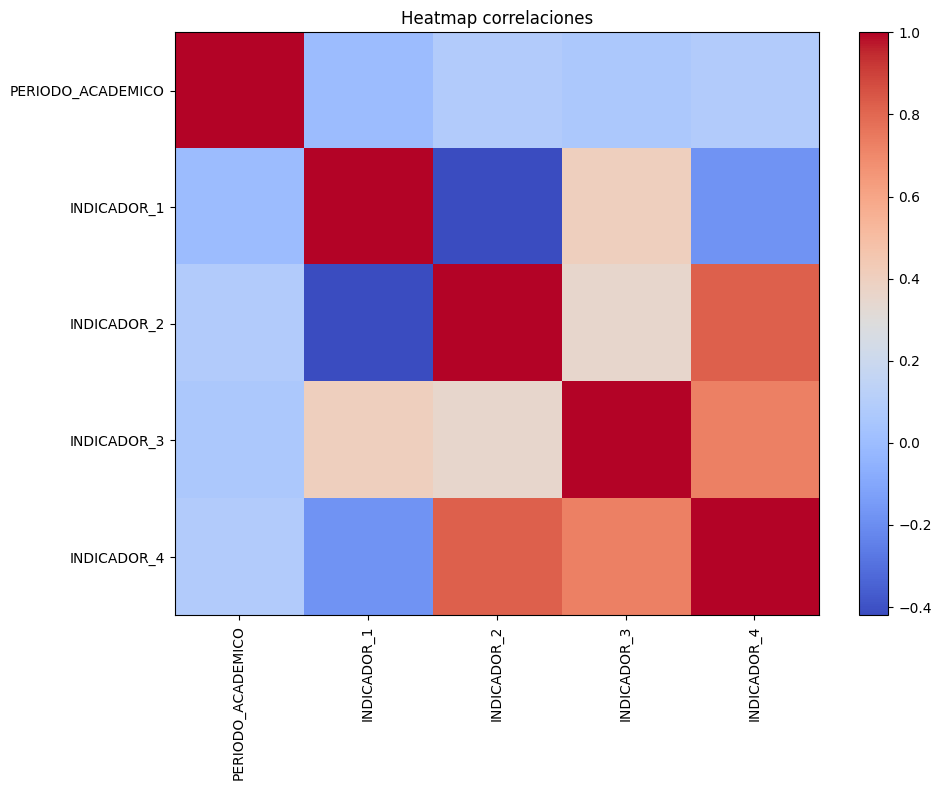

In [35]:
num_all = df_train.select_dtypes(include=[np.number]).drop(columns=["ID"])
if num_all.shape[1] > 1:
  corr = num_all.corr()
  fig, ax = plt.subplots(figsize=(10,8))
  cax = ax.imshow(corr.values, cmap='coolwarm', aspect='auto')
  ax.set_xticks(range(len(corr.columns)))
  ax.set_yticks(range(len(corr.index)))
  ax.set_xticklabels(corr.columns, rotation=90)
  ax.set_yticklabels(corr.index)
  fig.colorbar(cax)
  plt.title('Heatmap correlaciones')
  plt.tight_layout()
  plt.show()

### Conclusiones

El análisis muestra que la variable objetivo **RENDIMIENTO_GLOBAL** se distribuye de forma balanceada entre las cuatro categorías, lo que facilita entrenar el modelo.


En las variables categóricas, se detectaron variables con baja variabilidad como `E_PRIVADO_LIBERTD`, que no aportan información y deberían eliminarse.

Aunque, a pesar de esto, hay factores socioeconómicos como el **estrato socioeconómico** que están altamente relacionado con el rendimiento: los estudiantes de estratos más altos tienen proporciones mayores en categorías de rendimiento "alto" y "medio-alto", mientras que los de estratos bajos tienden a ubicarse más en "medio-bajo" y "bajo". Este hallazgo es mucho más marcado que el observado en la variable de acceso a internet, que también muestra diferencias pero de menor magnitud.  

Respecto a los indicadores numéricos, si bien se observan variaciones entre categorías, es importante destacar que **no se conoce con exactitud qué miden estos indicadores**, lo que limita la interpretación de su correlación con el rendimiento. Además, la matriz de correlaciones muestra relaciones entre ellos, pero no necesariamente fuertes ni claramente alineadas con la variable objetivo. Esto sugiere cautela: podrían ser útiles para la predicción, pero requieren validación y posiblemente normalización antes de su uso en modelos.  
